# Divisive

In [58]:
'''Read file'''

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from copy import deepcopy

#reading from Database uding pandas    
df = pd.read_excel ('data_h.xlsx')
data=np.array(df.T)
f1=data[0]
f2=data[1]


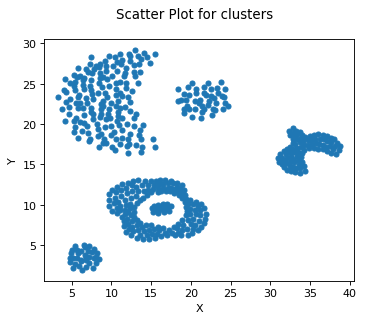

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
X=np.array(list(zip(f1,f2)))
data=np.array(list(zip(f1,f2)))

fig = plt.figure(figsize=(5, 4), dpi=80) 
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1],s=20)
plt.show()

In [132]:
# L2 and Cosine similarity measurement
import math

def l2_norm(x): #function to calculate L2 norm of a vector
    '''
    arguement
    ---------
    x - the vector

    returns - L2 norm of the vector
    '''
    sum = 0
    for i in range(len(x)):
        sum += x[i]**2
    return math.sqrt(sum)

def SimilarityMeasure(data1, data2, type='L2'):
    '''
    arguements 
    ----------
    data1, data2 - vectors, between which we are going to calculate similarity

    returns
    -------
    distance between the two vectors
    '''
    if type=='L2':
        # for L2 norm or pythagorean distance
        dist = 0
        for i in range(2):
            dist += (data1[i] - data2[i] )**2

        dist = math.sqrt(dist)
        return dist

    if type=='Cosine':
        # form cosine similarity = a.b/|a|.|b|
        dot_prod = 0
        data1_mod = l2_norm(data1)
        data2_mod = l2_norm(data2)
        for x in range(2):
            dot_prod += data1[x]*data2[x]
        return (dot_prod/(data1_mod*data2_mod))

    if type=='Manhattan':
        dist=abs(x_value - x_goal) + abs(y_value - y_goal)
        return dist
    
    else:
        print('Please provide proper similarity measurement type')
        return 0


In [126]:
import numpy as np 
from pathlib import Path
import pandas as pd 
import pickle

#this function calculates Distance Matrix or Similarity matrix
def DistanceMatrix(data =None,distance_type=None):
    '''
    arguement
    ---------
    data - the dataset whose Similarity matrix we are going to calculate

    returns
    -------
    the distance matrix by loading th pickle file
    '''
    pickleFilePath = Path('SimMat.pkl') #checking if the distance matrix was saved from last run to save processing
    Data_list = []
    for index, rows in data.iterrows():
        my_data = [rows.x, rows.y]
        Data_list.append(my_data)

    if pickleFilePath.is_file():
        temp_file=open(pickleFilePath, 'rb')
        return pickle.load(temp_file)

    else:
        N = len(data)
        similarity_mat = np.zeros([N, N]) #for cosine np.ones
        for i in range(N):
            for j in range(N):
                similarity_mat[i][j]=SimilarityMeasure(Data_list[i],Data_list[j],distance_type)


            with open('SimMat.pkl', 'wb') as file:
                pickle.dump(similarity_mat, file)

        temp_file=open(pickleFilePath, 'rb')
        return pickle.load(temp_file)


In [127]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd 

#this is the main class that computes the clusters using diana algorithm
class DianaClustering:   
    def __init__(self,data,distace_type): 
        '''
        constructor of the class, it takes the main data frame as input
        '''
        self.data = data  
        self.n_samples, self.n_features = data.shape
        self.distace_type = distace_type
    def fit(self,n_clusters):
        '''
        this method uses the main Divisive Analysis algorithm to do the clustering

        arguements
        ----------
        n_clusters - integer
                     number of clusters we want
        
        returns
        -------
        cluster_labels - numpy array
                         an array where cluster number of a sample corrosponding to 
                         the same index is stored
        '''
        similarity_matrix = DistanceMatrix(self.data,self.distace_type) # similarity matrix of the data
        clusters = [list(range(self.n_samples))]      # list of clusters, initially the whole dataset is a single cluster
        while True:
            c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
            max_cluster_dia = np.argmax(c_diameters)  #maximum cluster diameter
            max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
            splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
            last_clusters = clusters[max_cluster_dia]
            del last_clusters[max_difference_index]
            while True:
                split = False
                for j in range(len(last_clusters))[::-1]:
                    splinter_distances = similarity_matrix[last_clusters[j], splinters]
                    last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
                    if np.mean(splinter_distances) <= np.mean(last_distances):
                        splinters.append(last_clusters[j])
                        del last_clusters[j]
                        split = True
                        break
                if split == False:
                    break
            del clusters[max_cluster_dia]
            clusters.append(splinters)
            clusters.append(last_clusters)
            if len(clusters) == n_clusters:
                break

        cluster_labels = np.zeros(self.n_samples)
        for i in range(len(clusters)):
            cluster_labels[clusters[i]] = i

        return cluster_labels 

    
def PlotClusters(level=None,DATA=None,clusters=None):
    fig = plt.figure(figsize=(5, 5), dpi=80) 
    ax1=fig.add_subplot(1,1,1) #row, column, figure number
    ax1.set_title("Number of Clusters:{}".format(level))
    colors2 = ['r', 'g', 'b', 'y', 'c', 'm','lime','sandybrown']
    #fig, ax = plt.subplots()
    for i in range(level):
        points = np.array([DATA[j] for j in range(len(DATA)) if int(clusters[j]) == i])
        ax1.scatter(points[:, 0], points[:, 1], s=20, c=colors2[i])



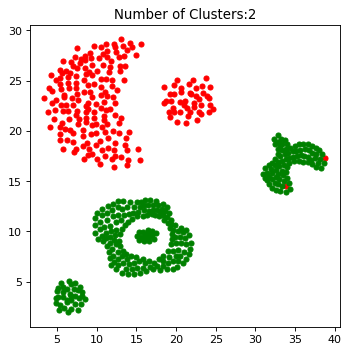

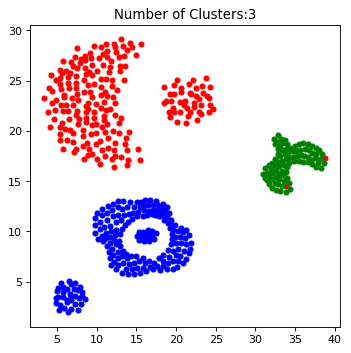

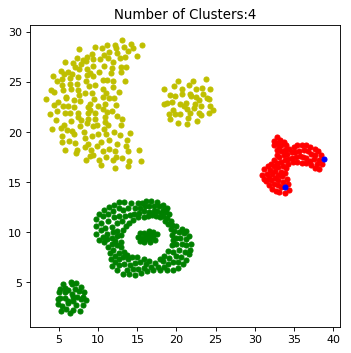

In [134]:

import pandas as pd
  
# read an excel file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_excel("data_h.xlsx"))
df.columns = ['x', 'y']
data = df
#data = pd.read_csv('HAYES_ROTH.csv') #reading the dataset csv file
#data = data.drop(columns="Name") # droping the unnecessary features
#data = data.drop(columns="Class")

DATA = np.array(list(zip(f1,f2)))
diana = DianaClustering(data,'L2') #applying the Diana Clustering algorithm
for level in range(2,5):
    clusters = diana.fit(level) 
    PlotClusters(level,DATA,clusters)

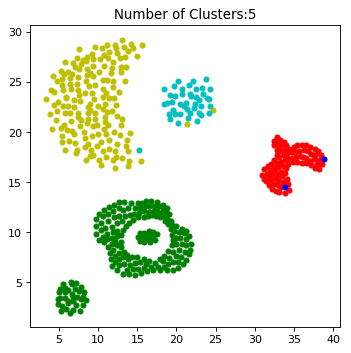

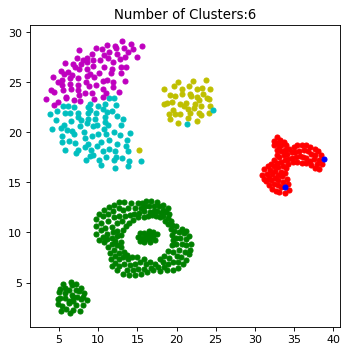

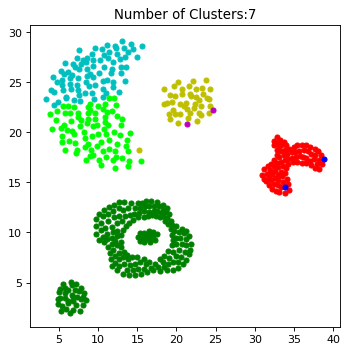

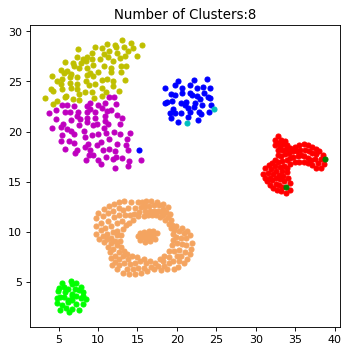

In [135]:
for level in range(5,9):
    clusters = diana.fit(level) 
    PlotClusters(level,DATA,clusters)

### Here we show results using three different metric consist of L2, Cosine and Manhattan in adition we use average metric in all cenario in this implementation
### To compare these three criteria, we use two outputs with 8 and 6 clusters, the latter as a suitable answer.

# L2

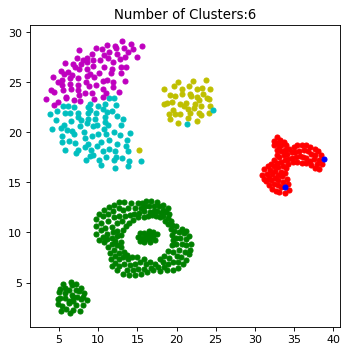

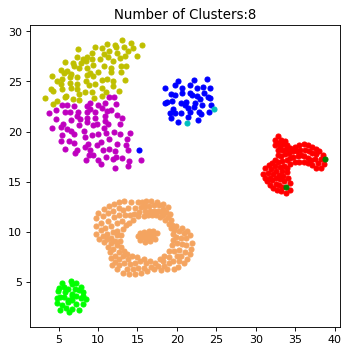

In [137]:
diana = DianaClustering(data,'L2') #applying the Diana Clustering algorithm
lev = [6,8]
for level in lev:
    clusters = diana.fit(level) 
    PlotClusters(level,DATA,clusters)

# Cosine

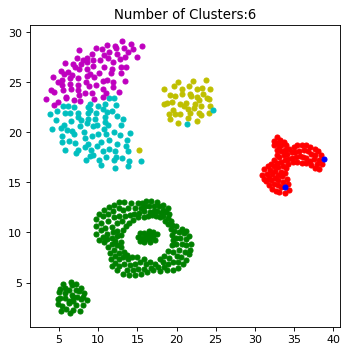

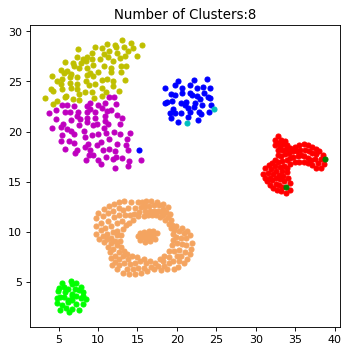

In [138]:
diana = DianaClustering(data,'Cosine') #applying the Diana Clustering algorithm
lev = [6,8]
for level in lev:
    clusters = diana.fit(level) 
    PlotClusters(level,DATA,clusters)

# Manhattan

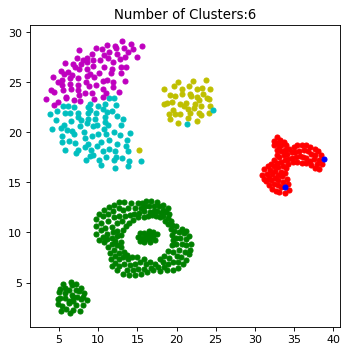

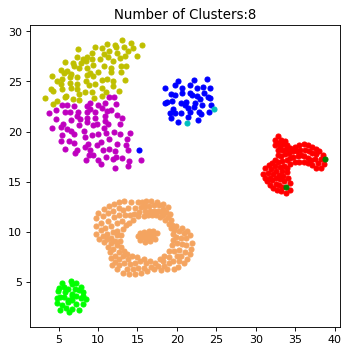

In [139]:
diana = DianaClustering(data,'Manhattan') #applying the Diana Clustering algorithm
lev = [6,8]
for level in lev:
    clusters = diana.fit(level) 
    PlotClusters(level,DATA,clusters)

# Corollary
## As can be seen, the different distance metric we examine here in the Divisive algorithm, unlike the different  selection metric in the Agglomerative algorithm, don't have significant effect on the result.